## Spotify Dataset Analysis

### This dataset was taken from Kaggle. It is a comprehensive collection of Spotify tracks across various genres. We are going to be perfomring an Exploratory Data Analysis on this dataset.

In [2]:
# import numpy
import numpy as np


# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

In [3]:
df_spotify = pd.read_csv('spotify_tracks.csv')
df_spotify.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


### Data Overview:

In [4]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB


Here, we can see that the 'duration_ms', despite being milliseconds is of int64 type. So let us convert to the hh:mm:ss format.

In [5]:
def ms_to_hhmmss(ms):
    seconds = ms // 1000
    minutes = seconds // 60
    hours = minutes // 60
    minutes = minutes % 60
    seconds = seconds % 60
    return f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Apply the function to the duration_ms column
df_spotify['duration_hhmmss'] = df_spotify['duration_ms'].apply(ms_to_hhmmss)

In [6]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6300 non-null   object
 1   name             6300 non-null   object
 2   genre            6300 non-null   object
 3   artists          6300 non-null   object
 4   album            6300 non-null   object
 5   popularity       6300 non-null   int64 
 6   duration_ms      6300 non-null   int64 
 7   explicit         6300 non-null   bool  
 8   duration_hhmmss  6300 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 400.0+ KB


Now, we see that the duration_ms has been converted to duration_hhmmss.

In [7]:
df_spotify['duration_hhmmss'] = pd.to_timedelta(df_spotify['duration_hhmmss'])

In [8]:
df_spotify['duration_hhmmss'].head()

0   0 days 00:02:52
1   0 days 00:02:52
2   0 days 00:02:24
3   0 days 00:01:56
4   0 days 00:02:13
Name: duration_hhmmss, dtype: timedelta64[ns]

In [9]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

Now, we have our duration in terms of hh:mm:ss format.

Sure, here are 20 questions to help you practice Exploratory Data Analysis (EDA) using your Spotify dataset:

### Univariate Analysis
1. What is the distribution of song popularity in the dataset?
2. What is the average duration of songs in the dataset in `hh:mm:ss` format?
3. How many songs are marked as explicit versus non-explicit?
4. What is the distribution of song durations in the dataset?
5. What are the top 10 most popular songs in the dataset?
6. How many unique artists are present in the dataset?
7. Which genre has the most songs in the dataset?
8. What is the distribution of song popularity scores (e.g., using a histogram)?
9. How many songs are there in total in the dataset?
10. What is the median duration of songs in the dataset?

### Bivariate Analysis
11. Is there a correlation between song duration and popularity?
12. How does the popularity of songs vary across different genres?
13. What is the relationship between the number of songs an artist has and their average popularity?
14. Do explicit songs tend to be more or less popular than non-explicit songs?
15. How does the duration of songs vary across different genres?
16. How do different albums by the same artist compare in terms of popularity?
17. What is the distribution of song durations for explicit and non-explicit songs?
18. How does the number of songs in an album correlate with the album's average popularity?

### Multivariate Analysis
19. How do genre and duration collectively affect the popularity of a song?
20. What are the top genres by average song popularity, and how do they compare in terms of song duration?

### Advanced Analysis
21. Which artist has the highest average song popularity?
22. What is the average popularity of songs for the top 5 most frequent genres?
23. How do the top 10% most popular songs compare to the rest in terms of duration and explicit content?
24. Are there any significant outliers in song duration or popularity?
25. How do different combinations of genres and explicit content affect song popularity?
26. What are the top 5 albums with the highest average song popularity?
27. How does the average song duration differ between genres with the highest and lowest average popularity?
28. How does the distribution of song popularity scores differ between the top 5 most common genres?
29. What is the distribution of the number of songs per artist?
30. How do the popularity distributions differ for songs released by different artists?

These questions should provide a comprehensive guide to exploring your Spotify dataset and gaining insights from it.

## Univariate Analysis

### Now, we will analyse each variable one-by-one.

In [10]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   id               6300 non-null   object         
 1   name             6300 non-null   object         
 2   genre            6300 non-null   object         
 3   artists          6300 non-null   object         
 4   album            6300 non-null   object         
 5   popularity       6300 non-null   int64          
 6   duration_ms      6300 non-null   int64          
 7   explicit         6300 non-null   bool           
 8   duration_hhmmss  6300 non-null   timedelta64[ns]
dtypes: bool(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 400.0+ KB


### 1. What is the distribution of song popularity in the dataset?

In [11]:
df_spotify['popularity']

0       58
1       57
2       42
3       46
4       33
5       14
6        0
7       29
8       15
9       45
10      39
11       8
12       0
13      25
14       5
15      71
16      25
17       3
18      63
19      27
20      16
21      71
22      31
23      10
24      68
25      13
26       1
27      61
28      13
29       1
30       0
31      24
32       1
33      58
34      17
35       3
36      29
37      25
38       0
39      65
40      18
41       2
42      57
43      30
44       0
45       0
46      25
47       0
48      56
49      14
50      28
51       2
52      68
53      21
54      30
55      69
56       8
57      25
58      69
59       3
60      26
61      68
62       4
63      65
64       0
65      20
66      62
67       1
68      32
69      57
70       0
71       0
72      67
73       0
74      17
75      56
76       3
77      20
78      55
79       1
80      53
81      11
82       0
83      63
84       2
85       0
86      54
87       0
88       0
89      57
90       0

<Axes: xlabel='popularity', ylabel='Count'>

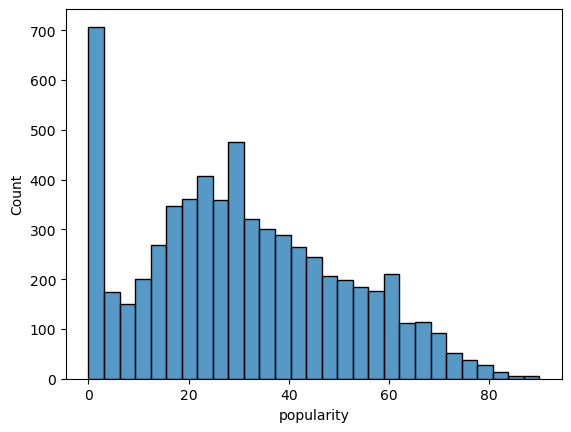

In [12]:
sns.histplot(data=df_spotify, x='popularity', palette='viridis')

We can see a Gaussian Distribution in the above with a steep increase in the popularity near 0, meaning that there are nearly 700 songs with popularity around and near 0.

In [13]:
df_spotify['popularity'].describe()

count    6300.000000
mean       30.754762
std        19.948991
min         0.000000
25%        16.000000
50%        29.000000
75%        45.000000
max        90.000000
Name: popularity, dtype: float64

The average popularity of all the songs is 30.7547 while half of the songs have popularity below 29. The highest popularity recorded is 90 while the lowest is 0.

### 2. What is the average duration of songs in the dataset in hh:mm:ss format?

In [14]:
df_spotify['duration_hhmmss'].describe()

count                         6300
mean     0 days 00:03:22.386349206
std      0 days 00:02:01.030371353
min                0 days 00:00:30
25%                0 days 00:02:27
50%                0 days 00:03:11
75%                0 days 00:03:56
max                0 days 01:00:01
Name: duration_hhmmss, dtype: object

Here, the average duration of songs is 3 minutes and 22 seconds.

### 3. How many songs are marked as explicit versus non-explicit?

In [15]:
df_spotify['explicit'].value_counts()

explicit
False    5106
True     1194
Name: count, dtype: int64

From the dataset, we can see that 5106 songs are not explicit while the rest 1194 are marked as explicit.

### 4. What is the distribution of song durations in the dataset?

In [16]:
df_spotify['duration_hhmmss'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6300 entries, 0 to 6299
Series name: duration_hhmmss
Non-Null Count  Dtype          
--------------  -----          
6300 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 49.3 KB


In [17]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

In [19]:
#df_spotify = df_spotify.drop('duration_timedelta', axis=1)

In [20]:
df_spotify.columns

Index(['id', 'name', 'genre', 'artists', 'album', 'popularity', 'duration_ms',
       'explicit', 'duration_hhmmss'],
      dtype='object')

<Axes: xlabel='duration_hhmmss', ylabel='Count'>

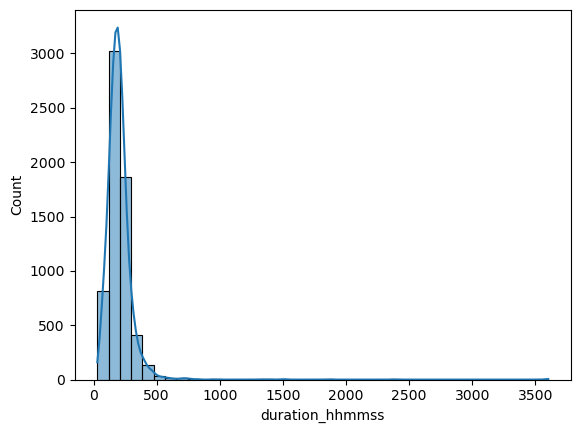

In [21]:
sns.histplot(df_spotify['duration_hhmmss'].dt.seconds, bins=40, kde=True)


- The majority of the song durations are clustered between 0 and 500 seconds (approximately 8 minutes and 20 seconds).
- The highest bar in the histogram indicates that the most common duration for songs is within a certain range (around 200 to 300 seconds, or approximately 3 to 5 minutes).
- The distribution is highly right-skewed, meaning that there are a few songs with significantly longer durations, but the vast majority of songs have shorter durations.
- The peak of the distribution is sharply concentrated at lower durations, with a rapid decline as the duration increases.


### 5. What are the top 10 most popular songs in the dataset?

In [22]:
df_sortedbypop = df_spotify.sort_values(by='popularity',ascending=False)

In [25]:
df_sortedbypop['name'].head(10)

1567                                           Houdini
5540           Clean Baby Sleep White Noise (Loopable)
4746                        BAND4BAND (feat. Lil Baby)
3158    One Of The Girls (with JENNIE, Lily Rose Depp)
2797                                         As It Was
3213                                          Magnetic
4745                                  Beautiful Things
3356                                          Magnetic
4748                                      Slow It Down
4610                                        Pink Skies
Name: name, dtype: object

Above, are the top 10 most popular songs.

### 6. How many unique artists are present in the dataset?

In [26]:
df_spotify['artists'].nunique()

4651

So, there are 4651 unique artists present in this database.

### 7. Which genre has the most songs in the dataset?

In [27]:
df_spotify['genre'].value_counts()

genre
acoustic             50
new-age              50
punk                 50
psych-rock           50
progressive-house    50
power-pop            50
post-dubstep         50
pop-film             50
pop                  50
piano                50
philippines-opm      50
party                50
pagode               50
opera                50
new-release          50
mpb                  50
r-n-b                50
movies               50
minimal-techno       50
metalcore            50
metal-misc           50
metal                50
mandopop             50
malay                50
latino               50
latin                50
kids                 50
k-pop                50
jazz                 50
j-rock               50
punk-rock            50
rainy-day            50
afrobeat             50
songwriter           50
work-out             50
turkish              50
trip-hop             50
trance               50
techno               50
tango                50
synth-pop            50
swedish   

Our dataset is fairly proportional as each genre has 50 songs each.

### 8. What is the distribution of song popularity scores (e.g., using a histogram)?

<Axes: xlabel='popularity', ylabel='Count'>

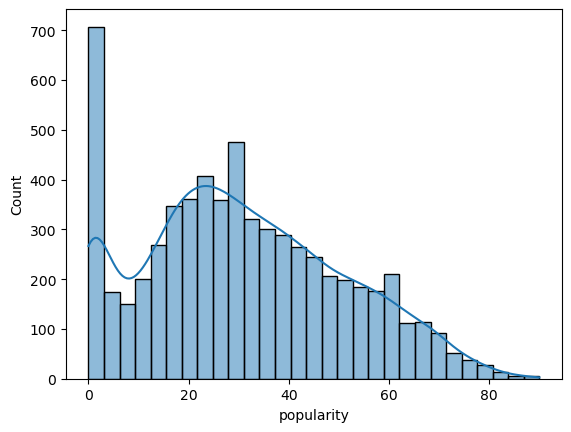

In [29]:
sns.histplot(data=df_spotify, x='popularity', palette='viridis', kde=True)

- The distribution is right-skewed, meaning that there are a few songs with very high popularity scores, but the majority of songs have lower popularity scores.
- There is a large peak at the lowest popularity score, indicating a significant number of songs have a popularity score of 0.
- The majority of songs have low popularity scores, with a substantial number having a score of 0. This could include newly released songs or those that have not gained much attention.
- The right-skewed nature of the distribution indicates that while there are some highly popular songs, they are relatively rare compared to the large number of less popular songs.
- The smaller peaks around 20, 30, and 50 suggest that these popularity scores are more frequent. These could be songs that are moderately well-known or have niche followings.

### 9. How many songs are there in total in the dataset?

In [30]:
df_spotify['name'].count()

6300

There are 6300 songs in this dataset.

### 10. What is the median duration of songs in the dataset?

In [31]:
df_spotify['duration_hhmmss'].median()

Timedelta('0 days 00:03:11')

The median duration is 3 minutes and 11 seconds.